In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm


%matplotlib inline

In [7]:
df = pd.read_csv("../amz_uk_price_prediction_dataset.csv")

In [9]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [17]:
# Create crosstab
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [21]:
# Normalize by rows to get proportions
crosstab_normalized = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
crosstab_normalized

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [23]:
crosstab_sorted = crosstab_normalized.sort_values(by=True, ascending=False)
crosstab_sorted

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [ ]:
#Yes, categories such as grovery, smart home security and lighting, health and personal care, mobile phone accessories, power and hand tools are more prevelant

In [39]:
# Perform Chi-square test
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [45]:
# Perform cramers test
cramers_v = association(crosstab_result, method='cramer')

0.1222829439760564

In [48]:
print(f"Chi-square: {chi2_statistic}, p-value: {chi2_p_value}, Cramér's V: {cramers_v}")


Chi-square: 36540.20270061387, p-value: 0.0, Cramér's V: 0.1222829439760564


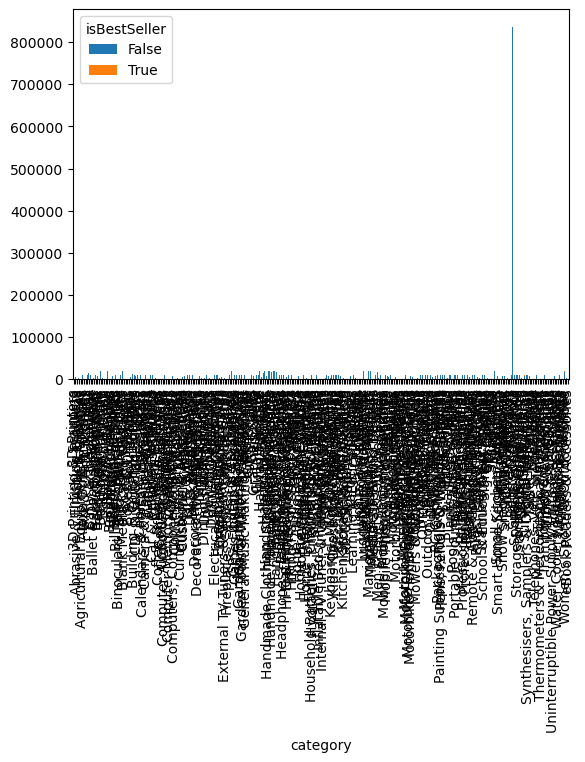

In [61]:
# Stacked bar chart
crosstab_result.plot(kind="bar", stacked=True);

In [65]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [67]:
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


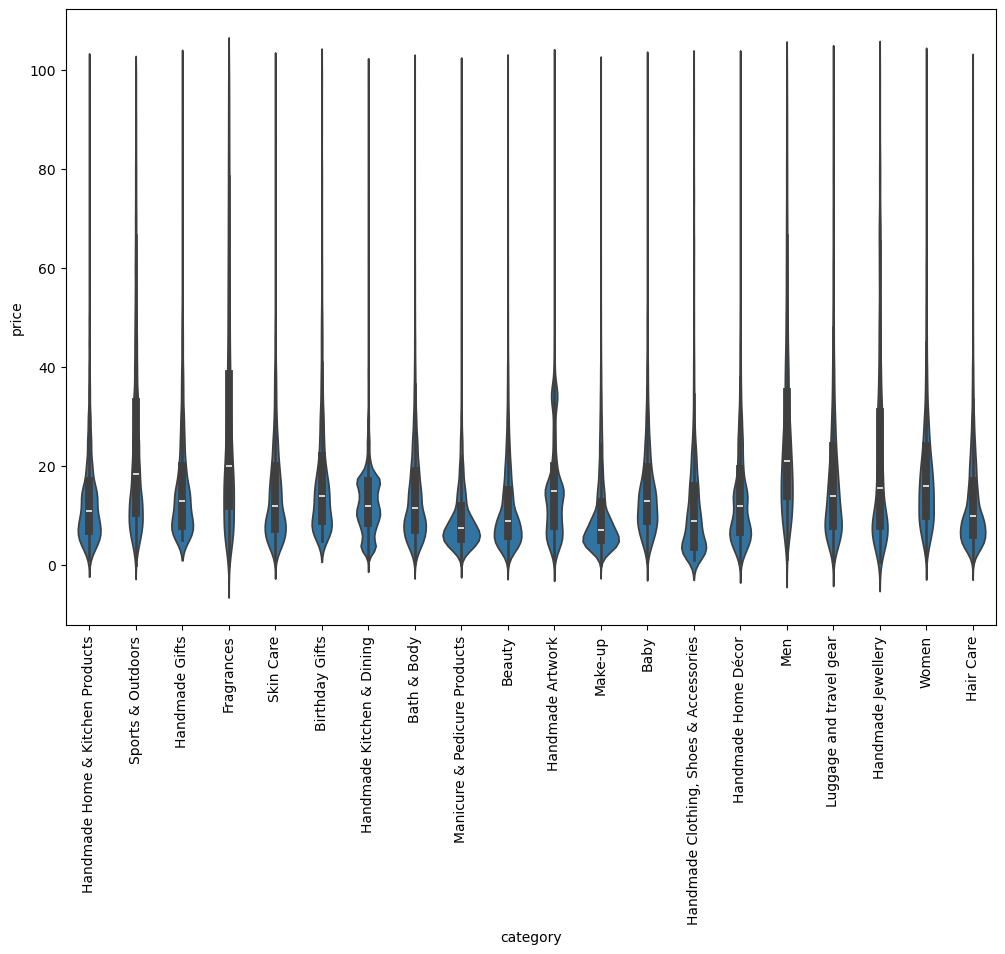

In [79]:
# Violin plot
top_categories = df_no_outliers['category'].value_counts().head(20).index

plt.figure(figsize=(12, 8))
sns.violinplot(data=df_no_outliers[df_no_outliers['category'].isin(top_categories)],
               x='category', y='price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# the categories with the highest median price are fragrances and Men

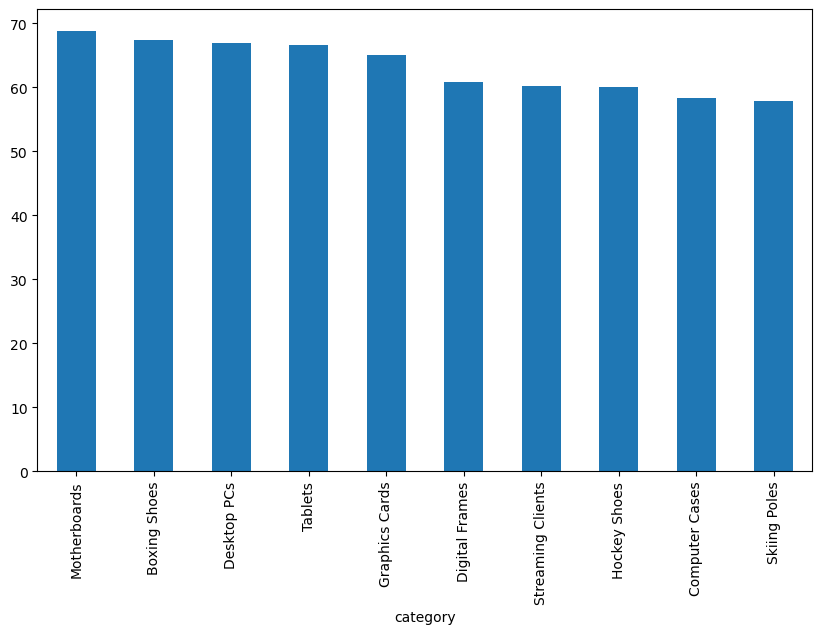

In [93]:
# Bar chart for average price
top_categories_avg_price = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False).head(10)
top_categories_avg_price.plot(kind='bar', figsize=(10, 6))
plt.show()

In [97]:
# Calculate average price for all categories
avg_price_per_category = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)


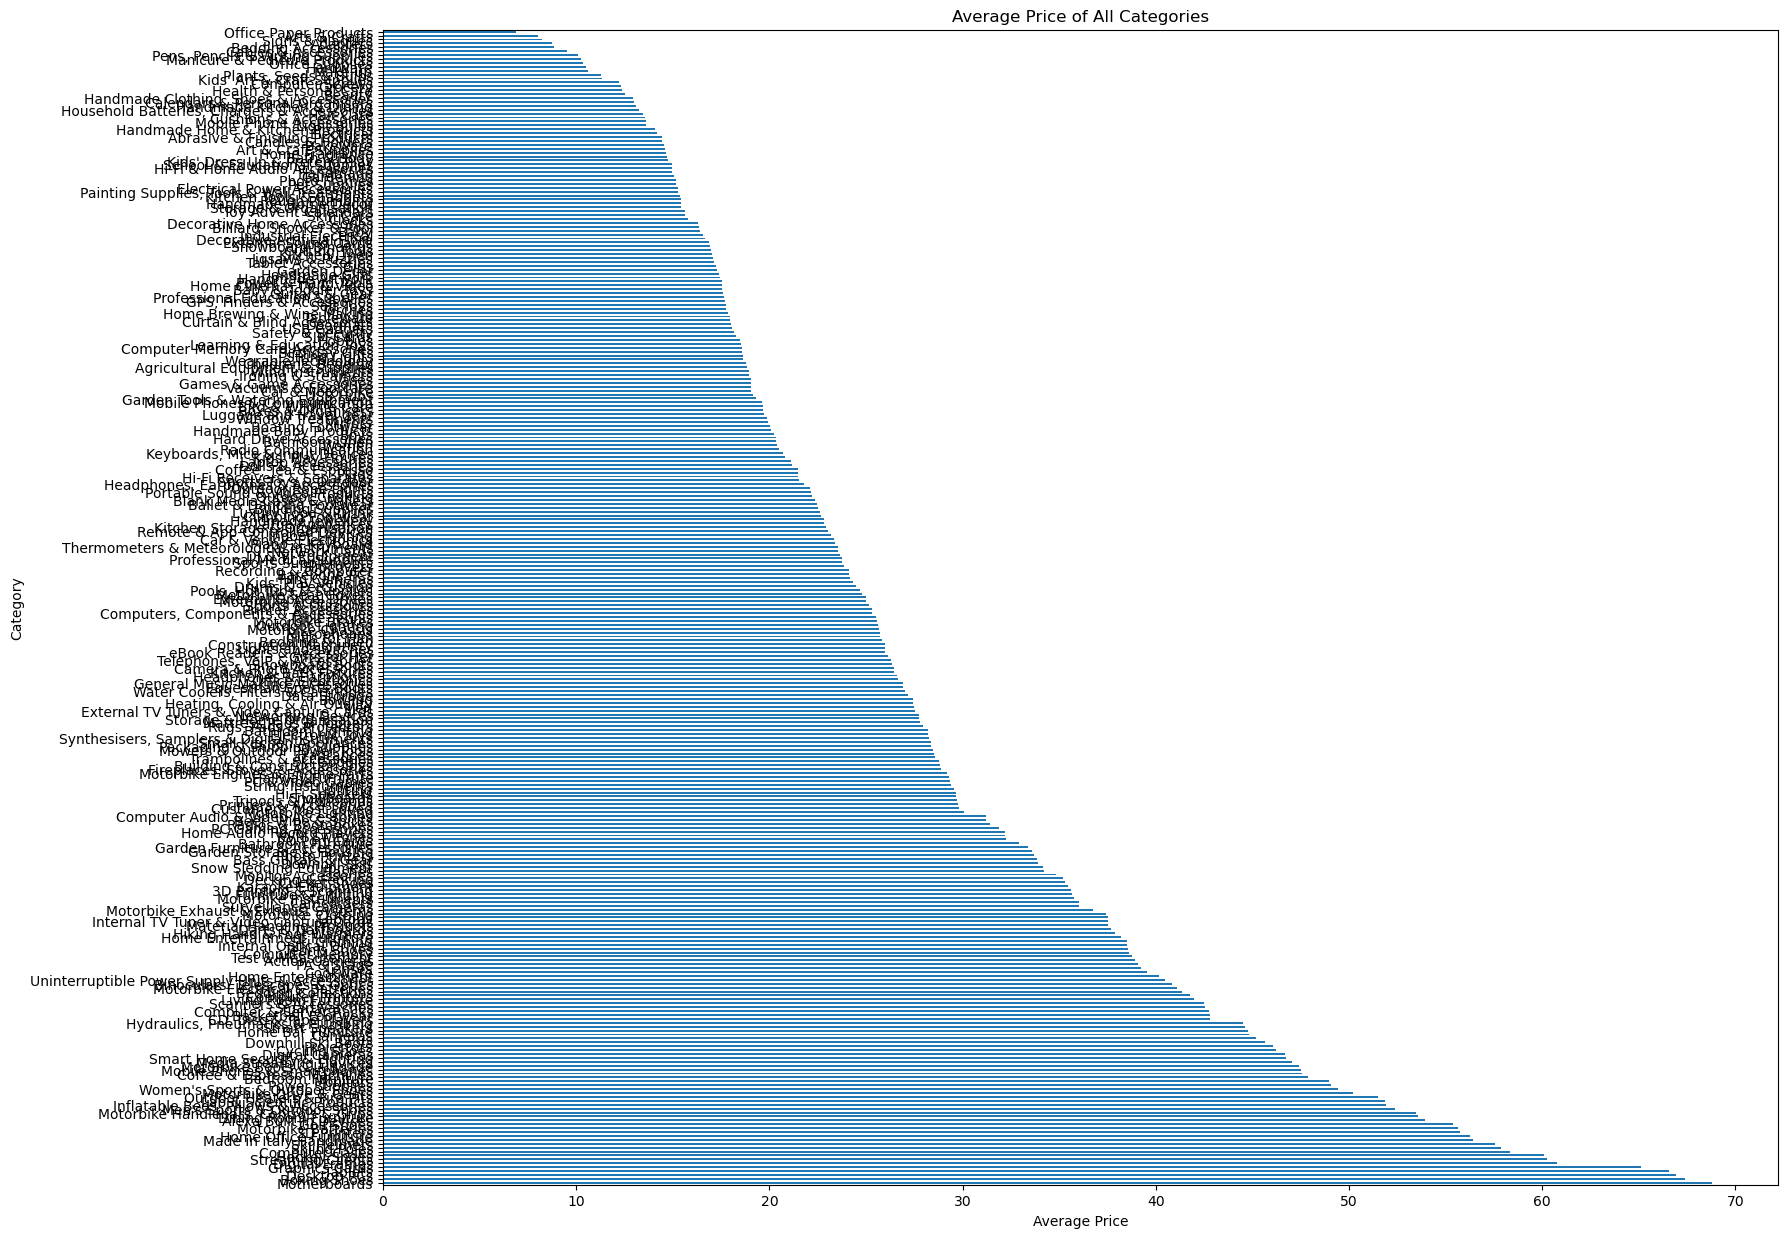

In [101]:
# Horizontal bar chart for all categories
avg_price_per_category.plot(kind='barh', figsize=(18, 15))  # Swap 'bar' with 'barh'
plt.title("Average Price of All Categories")
plt.xlabel("Average Price")
plt.ylabel("Category")
plt.show()


In [ ]:
# category with the highest average price motherboards, boxing shoes, desktop pcs, tables and graphics cards

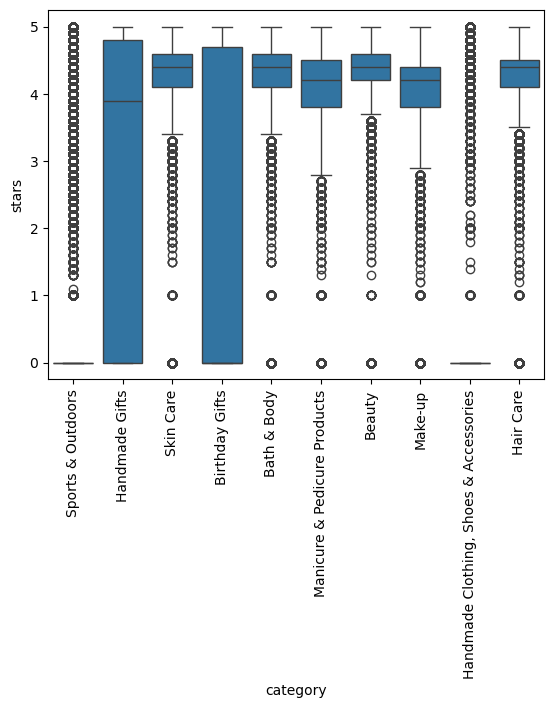

In [103]:
# Box plot for ratings
top_categories_ratings = df_no_outliers['category'].value_counts().head(10).index
sns.boxplot(data=df_no_outliers[df_no_outliers['category'].isin(top_categories_ratings)], x='category', y='stars')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# the products with the highest median rating are skin care, bath and beauty.

In [105]:
# Correlation coefficient
correlation = df_no_outliers[['price', 'stars']].corr()
correlation

,price,stars
price,1.000000,-0.077673
stars,-0.077673,1.000000


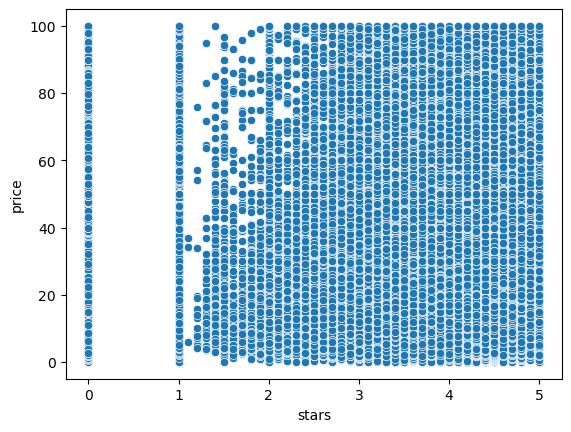

In [107]:
# Scatter plot
sns.scatterplot(data=df_no_outliers, x='stars', y='price')
plt.show()

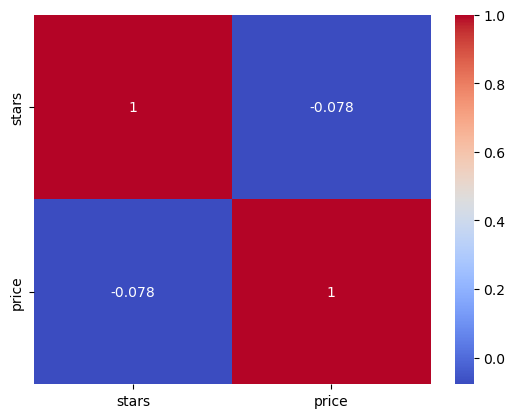

In [114]:
# using only stars and price with no outliers
numerical_columns = ['stars', 'price']
numerical_df = df_no_outliers[numerical_columns]

# heatmap
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [116]:
# there is weak correlation between price and stars

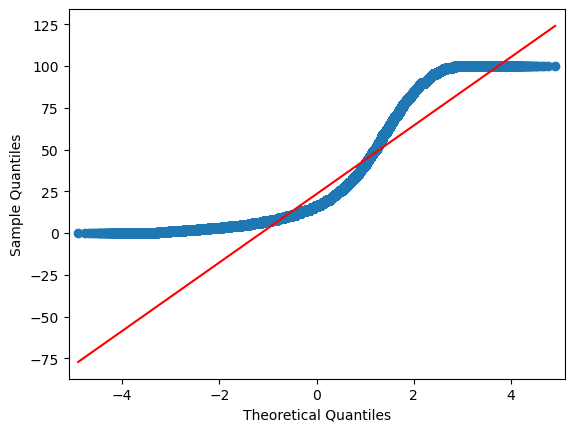

In [133]:
# QQ plot for the 'price' column
sm.qqplot(df_no_outliers['price'], line='s')
plt.show()